# Linear Regression
Data-set : Boston Housing Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Inference: We the dataset has data,target,features and description.

In [4]:
boston_dataset.keys()
# DATA - information about various houses located in Boston
# Target - prices of the located houses - dependent
# Feature names - Names of features - independent

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
boston = pd.DataFrame(boston_dataset.data,columns = boston_dataset.feature_names)
#Assigning feature-names to colums of data frame
boston.head()
#feature variables --> independent variables

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Adding the target column Price to the data frame
boston['Price'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Pre-processing

In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# Descriptive or Summary Statistic of the numeric columns
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

No Nulls in any column

# EDA

Let's visualise on the dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


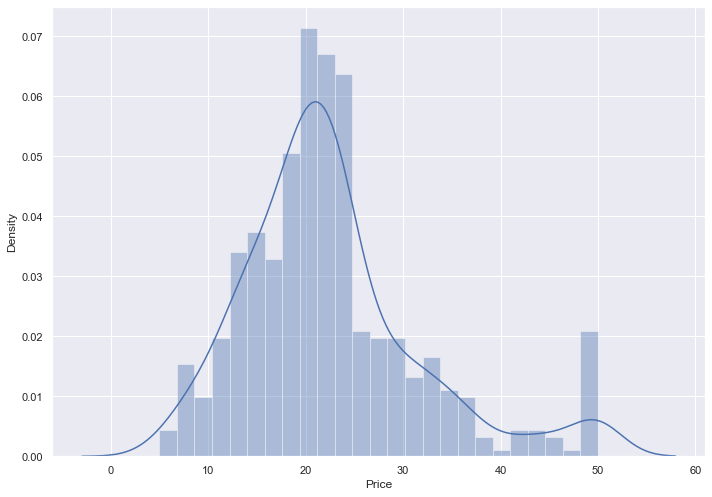

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['Price'],bins=25)
plt.show()

<AxesSubplot:>

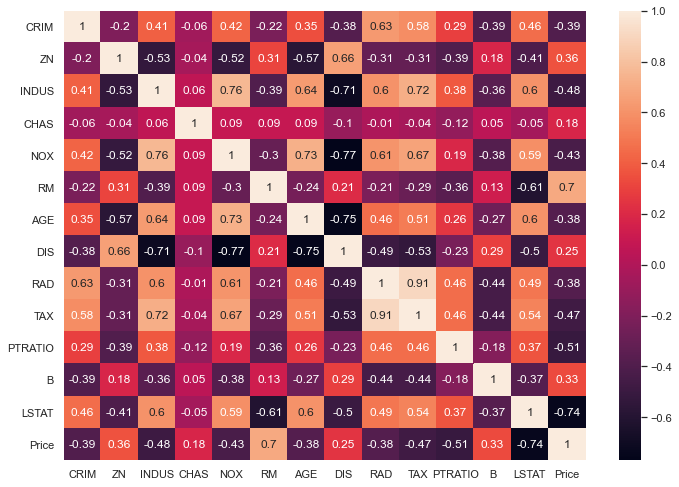

In [12]:
#Let's check how a variable influences other, using correlation
# Graph we use is HeatMap
correlation_matrix=boston.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

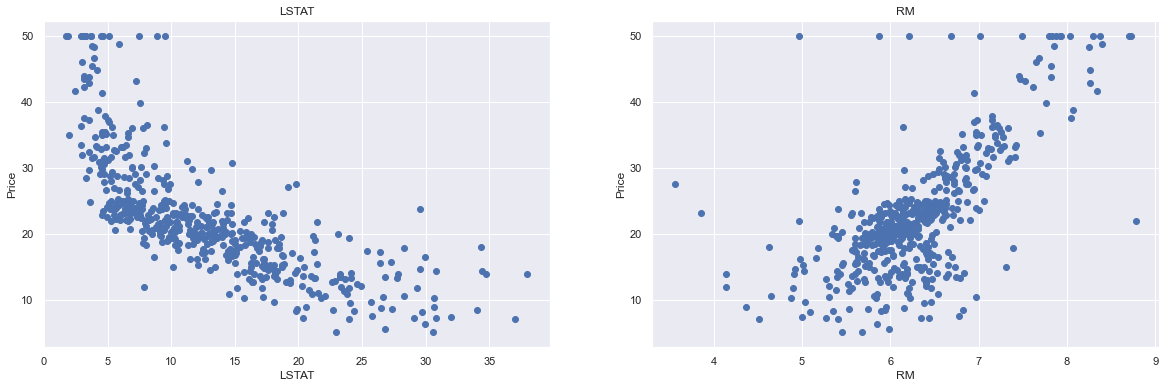

In [13]:
plt.figure(figsize=(20,6))
features = ['LSTAT','RM']
target = boston['Price']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')


# Machine Learning

In [14]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('Price', axis = 1)
X = pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=features)
y = boston['Price']

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=5)

# X_train contains 80% of total dataset
print(X_train.shape)
print(Y_train.shape)
# X_test contains 20% of total dataset
print(X_test.shape)
print(Y_test.shape)

(404, 2)
(404,)
(102, 2)
(102,)


In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
lr = LinearRegression()
#Train/fit the model to training data
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Predicted features')

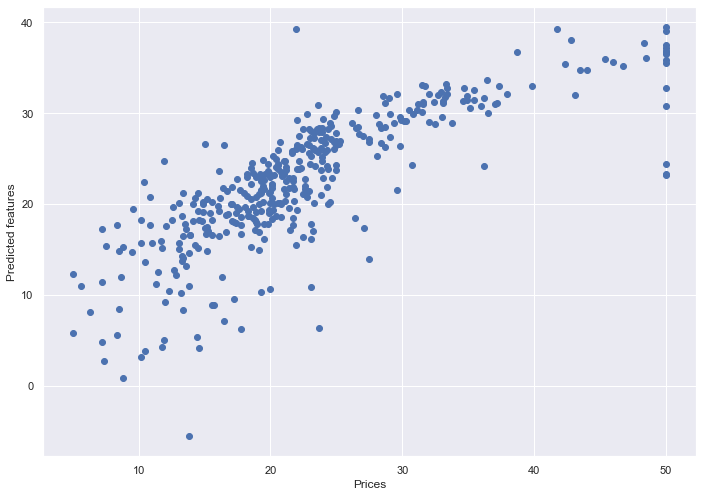

In [18]:
Y_train_predict = lr.predict(X_train)

plt.scatter(Y_train,Y_train_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted features")

Text(0, 0.5, 'Predicted features')

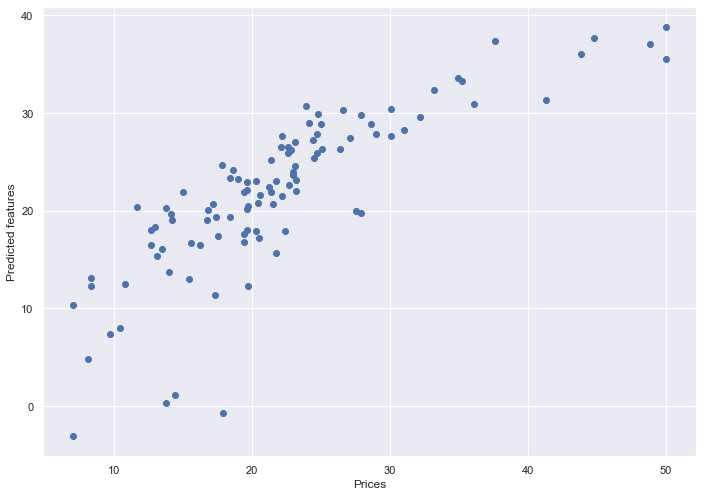

In [19]:
Y_test_predict = lr.predict(X_test)

plt.scatter(Y_test,Y_test_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted features")

Regression evaluation metrics
Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [21]:
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2=r2_score(Y_train,Y_train_predict)
mae=mean_absolute_error(Y_train,Y_train_predict)

print(" The model performance of training set")
print("******--------------*******")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("mean_absolute_error is {}".format(mae))
print("\n")


rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2=r2_score(Y_test,Y_test_predict)
mae=mean_absolute_error(Y_test,Y_test_predict)


print(" The model performance of testing set")
print("******--------------*******")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("mean_absolute_error is {}".format(mae))

print("\n")

 The model performance of training set
******--------------*******
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701
mean_absolute_error is 4.031115615178025


 The model performance of testing set
******--------------*******
RMSE is 5.137400784702911
R2 score is 0.6628996975186954
mean_absolute_error is 3.791310213343107


